# Project: Traffic Stop Data Preprocessing and Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to clean, preprocess, and explore a dataset containing information on police traffic stops. This prepares the data for machine learning modeling while uncovering key patterns and relationships within the dataset.

## Key Tasks Performed

### 1. Data Cleaning
- **Dropped rows with null values** in critical columns (`driver_gender`, `driver_race`, `violation`, `is_arrested`, `stop_duration`).
- **Reset the DataFrame index** after dropping nulls to maintain a clean structure.

### 2. Feature Encoding
- **Binary Encoding**: Converted `driver_gender` into 0 (Male) and 1 (Female).
- **Ordinal Encoding**: Transformed `stop_duration` into ordered numeric values:
  - `'0-15 Min'` → 1
  - `'16-30 Min'` → 2
  - `'30+ Min'` → 3
- **One-Hot Encoding**: Encoded categorical columns like `driver_race` and `violation`, excluding the first category to avoid multicollinearity.

### 3. Exploratory Data Analysis (EDA)
- Explored data distributions and relationships using:
  - **Value counts** and **summary statistics**
  - **Correlation heatmap** to observe the linear relationships between features
  - Identified potential signals that could influence arrest decisions

### 4. Export Clean Data
- Saved the final, preprocessed DataFrame as `cleaned_traffic_data.csv` for use in modeling.

## Outcome
A well-structured and ready-to-use dataset, with encoded features and no missing values, suitable for building predictive machine learning models like logistic regression.



In [230]:
# Import all necessary Libraries
import pandas as pd
import numpy as np

# Import visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
# Load dataset
df = pd.read_csv("police_data.csv")

In [232]:
# Check data 
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [233]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

### **Removing columns that are not usefull or contain so many null values**

In [234]:
df.index

RangeIndex(start=0, stop=65535, step=1)

In [235]:
# Check null values
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [236]:
# Remove "Country Name" which is blank
df.drop( columns= "country_name", inplace=True)

In [237]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [238]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [239]:
# To see each column withits index
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")


0: stop_date
1: stop_time
2: driver_gender
3: driver_age_raw
4: driver_age
5: driver_race
6: violation_raw
7: violation
8: search_conducted
9: search_type
10: stop_outcome
11: is_arrested
12: stop_duration
13: drugs_related_stop


### **Droping columns using Indexing**

In [240]:
# Keep only selected columns by index
df = df.iloc[:, [2, 5, 7, 8, 11, 12, 13]]

# Reset the index for clean handling
df = df.reset_index(drop=True)

# Show the final columns
print("Final columns:", df.columns.tolist())
print("Shape of cleaned dataset:", df.shape)


Final columns: ['driver_gender', 'driver_race', 'violation', 'search_conducted', 'is_arrested', 'stop_duration', 'drugs_related_stop']
Shape of cleaned dataset: (65535, 7)


In [241]:
df.isnull().sum()

driver_gender         4061
driver_race           4060
violation             4060
search_conducted         0
is_arrested           4060
stop_duration         4060
drugs_related_stop       0
dtype: int64

In [242]:
df.shape

(65535, 7)

### **Droping Rows with null values**

In [243]:
# Drop rows with nulls in key columns
columns_with_nulls = ['driver_gender', 'driver_race', 'violation', 'is_arrested', 'stop_duration']
df = df.dropna(subset=columns_with_nulls)

# Reset index for cleanliness
df = df.reset_index(drop=True)

# Check updated shape
print("Shape after dropping nulls:", df.shape)
print("Any nulls left?\n", df.isnull().sum())



Shape after dropping nulls: (61474, 7)
Any nulls left?
 driver_gender         0
driver_race           0
violation             0
search_conducted      0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64


### ** Encoding & Preparing the Final DataFrame**

In [244]:
# Map binary columns
df['search_conducted'] = df['search_conducted'].map({True: 1, False: 0})
df['drugs_related_stop'] = df['drugs_related_stop'].map({True: 1, False: 0})

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['driver_race', 'violation'], drop_first=True)

# Encode other columns
df_encoded['driver_gender'] = df_encoded['driver_gender'].map({'M': 0, 'F': 1})
df_encoded['stop_duration'] = df_encoded['stop_duration'].map({'0-15 Min': 1, '16-30 Min': 2, '30+ Min': 3})


In [245]:
df_encoded

,driver_gender,search_conducted,is_arrested,stop_duration,drugs_related_stop,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,violation_Moving violation,violation_Other,violation_Registration/plates,violation_Seat belt,violation_Speeding
0,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
1,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
2,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
3,0,0,True,2.0,0,False,False,False,True,False,True,False,False,False
4,1,0,False,1.0,0,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61469,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
61470,1,0,False,1.0,0,False,False,False,True,False,False,False,False,True
61471,0,0,False,1.0,0,False,False,False,True,False,False,False,False,True
61472,0,0,False,1.0,0,True,False,False,False,False,False,False,False,False


## **Visualizing data to see relationships and distributions**

#### Histograms and box plots to help me understand the distribution of the numerical features


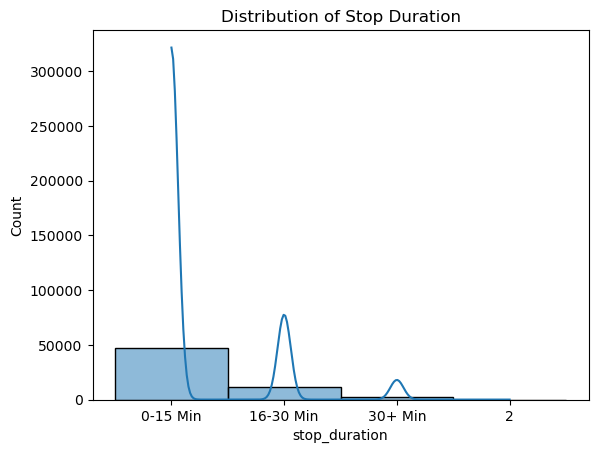

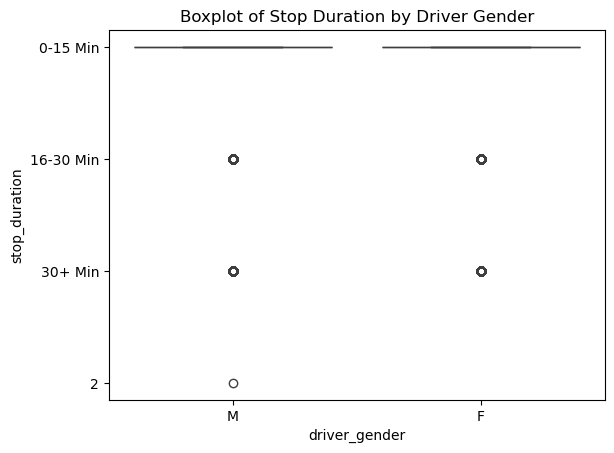

In [246]:
# Plot distribution of stop_duration
sns.histplot(df['stop_duration'], kde=True)
plt.title('Distribution of Stop Duration')
plt.show()

# Boxplot for driver_gender (since it's a binary column)
sns.boxplot(x=df['driver_gender'], y=df['stop_duration'])
plt.title('Boxplot of Stop Duration by Driver Gender')
plt.show()


### Correlation heatmap helps to understand how the features relate to one another

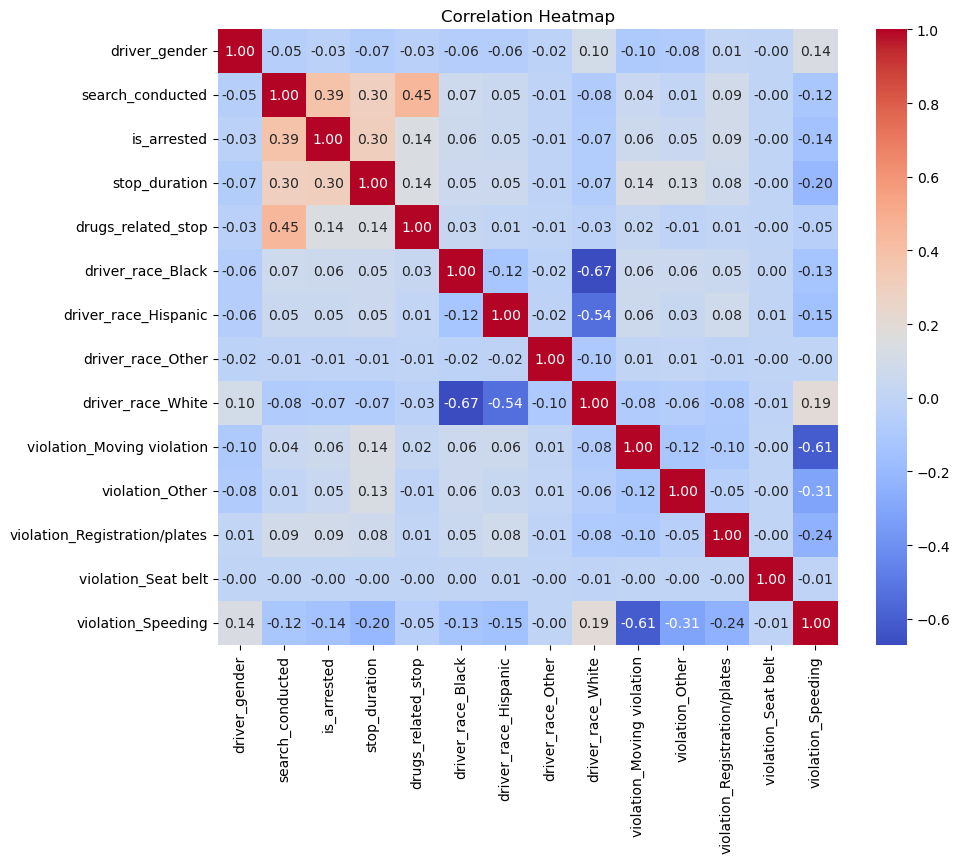

In [247]:
# Correlation heatmap
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Visualizing Categorical Variables

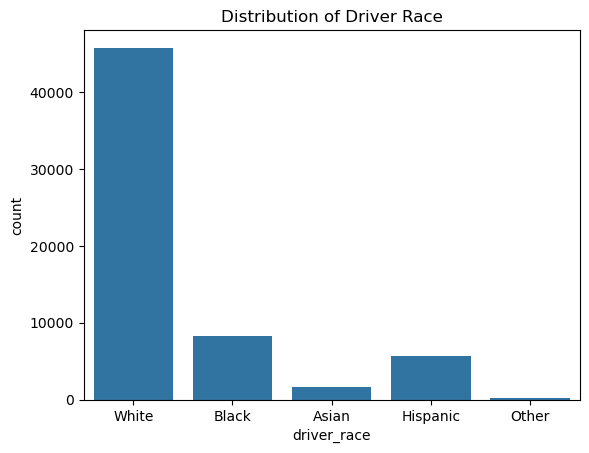

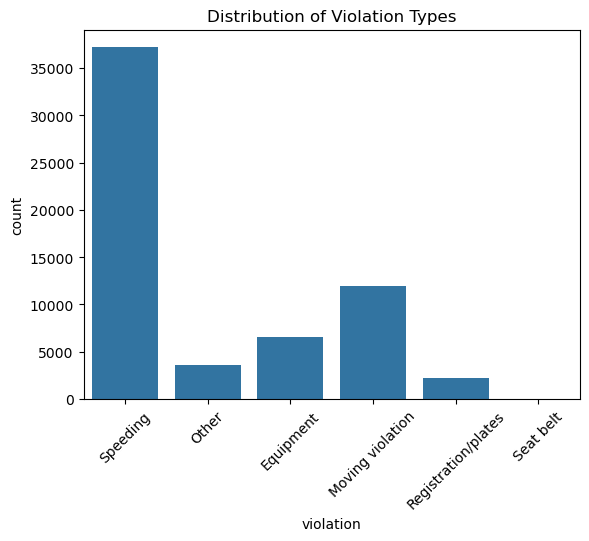

In [248]:
# Count plot for driver race
sns.countplot(x='driver_race', data=df)
plt.title('Distribution of Driver Race')
plt.show()

# Count plot for violation types
sns.countplot(x='violation', data=df)
plt.title('Distribution of Violation Types')
plt.xticks(rotation=45)
plt.show()


### Class Imbalance for "Is_arrested" column

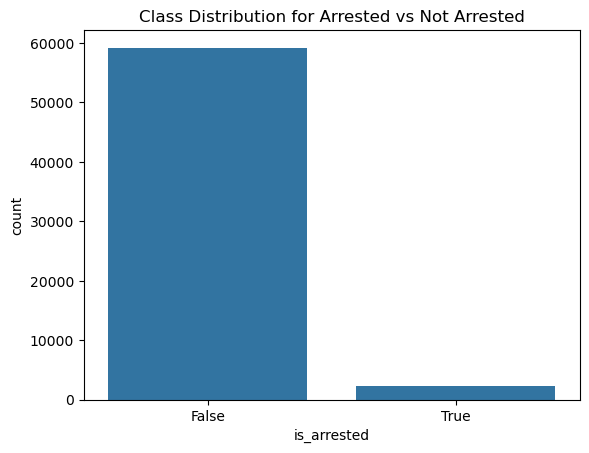

In [249]:
# Check for class imbalance in target variable
sns.countplot(x='is_arrested', data=df)
plt.title('Class Distribution for Arrested vs Not Arrested')
plt.show()


### Pairplot/Scatterplots: To see interaction between different features



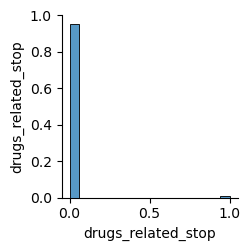

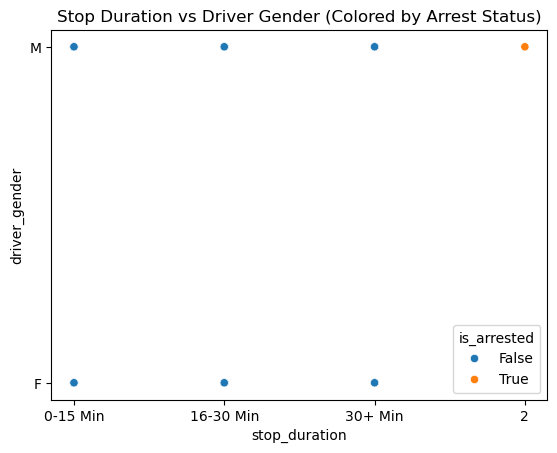

In [250]:
# Pairplot for numerical features
sns.pairplot(df[['stop_duration', 'driver_gender', 'drugs_related_stop']])
plt.show()

# Scatter plot for relationships between features
sns.scatterplot(x='stop_duration', y='driver_gender', hue='is_arrested', data=df)
plt.title('Stop Duration vs Driver Gender (Colored by Arrest Status)')
plt.show()


### Save Preprocessed data

In [252]:
# Save cleaned data to file
df_encoded.to_csv("cleaned_traffic_data.csv", index=False)
print("Data preprocessing complete. Cleaned data saved as 'cleaned_traffic_data.csv'.")

Data preprocessing complete. Cleaned data saved as 'cleaned_traffic_data.csv'.
